
# 回帰分析

## ライブラリなど読み込み

In [65]:
import numpy as np               
import matplotlib.pyplot as plt  
import pandas as pd

## Data: Income vs Life.Expectancy (2018)

In [66]:
# データ読み込み
dat = np.array(pd.read_csv('data/factfulness.csv').values[:,1:3]).astype('float64')
X = dat[:,0].reshape(-1,1) # データ行列
y = dat[:,1]                          # 観測ベクトル

In [67]:
X

array([[  1870.],
       [ 12400.],
       [ 13700.],
       [  5850.],
       [ 21000.],
       [ 18900.],
       [  8660.],
       [ 45800.],
       [ 44600.],
       [ 16600.],
       [ 21900.],
       [ 44300.],
       [  3720.],
       [ 16000.],
       [ 17200.],
       [ 42800.],
       [  7710.],
       [  2170.],
       [  9930.],
       [  6980.],
       [ 12100.],
       [ 16500.],
       [ 14300.],
       [ 76900.],
       [ 18900.],
       [  1710.],
       [   691.],
       [  3830.],
       [  3170.],
       [ 43800.],
       [  6420.],
       [   689.],
       [  1860.],
       [ 23400.],
       [ 16000.],
       [ 13700.],
       [  1440.],
       [   751.],
       [  5620.],
       [ 16200.],
       [  3760.],
       [ 22600.],
       [ 20000.],
       [ 32200.],
       [ 32300.],
       [ 46600.],
       [  3540.],
       [ 15200.],
       [ 10200.],
       [ 10800.],
       [  8290.],
       [ 20500.],
       [  1250.],
       [ 29500.],
       [  1800.],
       [  

## データプロット

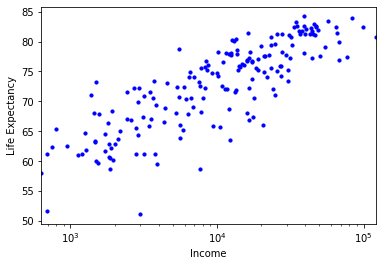

In [68]:
plt.xlabel('Income'); plt.ylabel("Life Expectancy")
plt.xlim(np.min(X), np.max(X))
plt.xscale("log")      # x軸をlog プロット
plt.scatter(X, y, s=10, c='blue')       # データ点のプロット
plt.show()

## 最小2乗法による推定：
sklearn.linear_model.LinearRegression

In [69]:
# モジュール読込み
from sklearn import linear_model

lf = linear_model.LinearRegression()     # 線形モデルの設定
lf.fit(np.log(X), y)                                     # 最小２乗法： 対数をとったデータに適用
np.array([lf.intercept_,  lf.coef_])         # 切片， 傾き

array([27.451416054831242, array([4.92938809])], dtype=object)

## 予測値の計算

In [70]:
Xt = np.linspace(np.min(X),np.max(X),100).reshape(-1,1) # テスト点の生成
py = lf.predict(np.log(Xt))   # 予測値

## プロット：推定結果

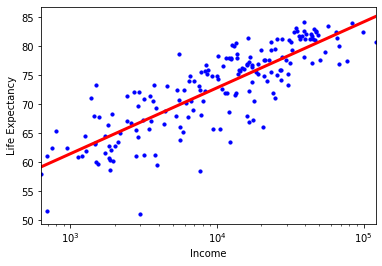

In [71]:
plt.xlabel('Income'); plt.ylabel("Life Expectancy")
plt.xlim(np.min(X), np.max(X))
plt.xscale("log")                                # log プロット
plt.scatter(X, y, s=10, c='blue')      # データ点のプロット
plt.plot(Xt, py,'r-',lw=3)                   # 予測値のプロット
plt.show()

## リッジ回帰

## データ

In [72]:
n = 100            # データ数
x = np.random.uniform(-2,2,n); ord = np.argsort(x)
y = np.sin(2*np.pi*x)/x + np.random.normal(scale=0.5,size=n)

## プロット

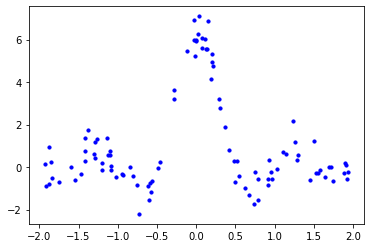

In [73]:
plt.scatter(x, y,c='blue',s=10)            # データ点プロット
plt.show()

## 線形回帰モデル：多項式回帰

In [74]:
# データ行列
degree = 10
X = np.power.outer(x,np.arange(1,degree+1))  #  基底関数：多項式
X.shape

(100, 10)

## リッジ回帰：
sklearn.linear_model.Ridge

In [75]:
# モジュール読込み
from sklearn import linear_model
rfit = linear_model.Ridge(alpha=0.1).fit(X,y)       # リッジ回帰(alpha = 0.1)

In [76]:
rfit.intercept_   # 切片 w0 

4.757212928511364

In [77]:
rfit.coef_           # 係数 w1

array([  0.62196169, -15.55939278,  -1.31139827,  13.58875334,
         0.84959861,  -3.4973826 ,  -0.22077129,  -0.14272115,
         0.01952316,   0.10236702])

## 予測

In [78]:
tx = np.linspace(-1.8, 1.8, 100)                               # テスト点
tX = np.power.outer(tx,np.arange(1,degree+1))   # テスト点に対応するデータ行列

In [79]:
# 予測
py = rfit.predict(tX)

## プロット

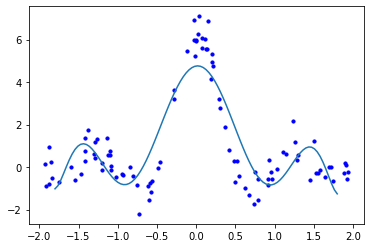

In [80]:
plt.scatter(x,y,c='blue',s=10)          # データ点のプロット
plt.plot(tx,py)
plt.show()

## プロット：正則化パラメータ alpha ごとの結果

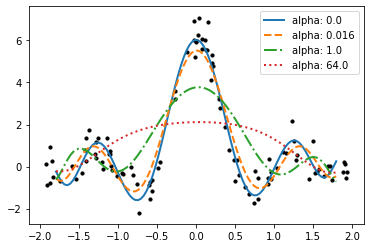

In [81]:
a  = np.array([0, 2**(-6), 1, 2**6])      # 正則化パラメータの候補
ls = ['-', '--', '-.', ':']                                  # プロットのラインスタイル
for i in np.arange(a.size):
    rfit = linear_model.Ridge(alpha=a[i]).fit(X,y)       # リッジ回帰
    py = rfit.predict(tX)
    # alpha 毎に，リッジ回帰の結果をプロット  
    plt.plot(tx,py,label="alpha: "+str(round(a[i], 3)), ls=ls[i], lw=2)
plt.scatter(x,y,c='black',s=10)              # データ点プロット
plt.legend();plt.show()

## 交差検証法

## データ

In [82]:
n = 100            # データ数
x = np.random.uniform(-2,2,n); ord = np.argsort(x)
y = np.sin(2*np.pi*x)/x + np.random.normal(scale=0.5,size=n)

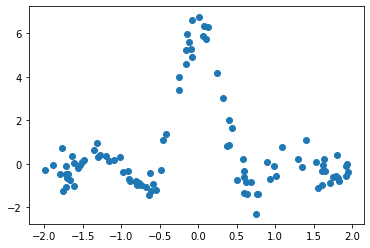

In [83]:
plt.scatter(x,y); plt.show()

## いろいろな正則化パラメータでリッジ回帰

In [84]:
degree = 15     # 15次多項式モデルを使う
X = np.power.outer(x,np.arange(1,degree+1))  #  基底関数：多項式

alphas  = 10.**np.arange(-13,5)        # 正則化パラメータの候補
alphas

array([1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06,
       1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04])

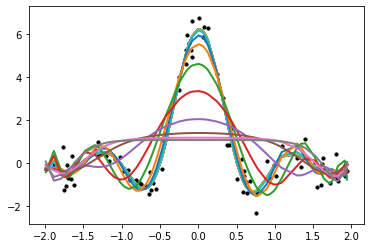

In [85]:
for a in alphas:
    rd = linear_model.Ridge(alpha=a).fit(X,y)       # リッジ回帰
    py = rd.predict(X)
    # alpha 毎に，リッジ回帰の結果をプロット  
    plt.plot(np.sort(x), py[ord], ls='-', lw=2)
plt.scatter(x, y, c='black', s=10)
plt.show()

## 交差検証法：
sklearn.linear_model.RidgeCV

In [86]:
print('alphas: ',alphas)

alphas:  [1.e-13 1.e-12 1.e-11 1.e-10 1.e-09 1.e-08 1.e-07 1.e-06 1.e-05 1.e-04
 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03 1.e+04]


In [87]:
cvf = linear_model.RidgeCV(cv=10, alphas=alphas)  # モデル設定：リッジ回帰の交差検証法
cvf.fit(X,y)       # 学習

RidgeCV(alphas=array([1.e-13, 1.e-12, 1.e-11, 1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06,
       1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [88]:
# 最適な alpha (候補：10^(-13),...,10^4)
cvf.alpha_

0.0001

## 最適な alpha によるリッジ回帰

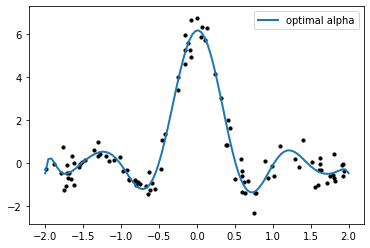

In [89]:
tx = np.linspace(-2,2, 100)                                       # テスト点
tX = np.power.outer(tx,np.arange(1,degree+1))   # テスト点に対応するデータ行列
py = cvf.predict(tX)          # 予測
plt.plot(tx,py,label="optimal alpha", ls='-', lw=2)
plt.scatter(x,y,c='black',s=10)              # データ点プロット
plt.legend(); plt.show()